In [1]:
# import nessary libraries
import numpy as np
from skimage import io
from math import sqrt
from copy import deepcopy
import matplotlib.pyplot as plt
from time import time

In [2]:
# read the image to numpy array
image = io.imread('parrot.jpg')
w,h,d = image.shape
print('shape of original image:',image.shape)
image_array = image.reshape(w*h,3) / 255
print('shape of image array:',image_array.shape)

shape of original image: (400, 500, 3)
shape of image array: (200000, 3)


In [3]:
# function to generate k random centroids 
def generate_centroids(k,array):
    # Number of clusters
    K = k
    # Number of training data
    n = image_array.shape[0]
    # Number of features in the data
    c = image_array.shape[1]
    # Generate random centroids, here we use standard deviation and mean to ensure it represent the whole data
    mean = np.mean(image_array, axis = 0)
    std = np.std(image_array, axis = 0)
    centroids = np.random.randn(K,c) * std + mean
    return centroids

In [4]:
# function to calculate distances
def cal_dis(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [15]:
# main function of kmeans algorithm
def kmeans(k, data, maxiter=100):
    t0 = time()
    centroids = generate_centroids(k,data)
    old_centroids = np.zeros(centroids.shape) # to store old centroids
    new_centroids = deepcopy(centroids) # Store new centroids
    error = np.linalg.norm(new_centroids - old_centroids)
    print('The original error is:',error)
    iteration = 0
    while error != 0 and iteration < maxiter:
        iteration = iteration + 1
        count = np.zeros(k)
        labels = []
        old_centroids = deepcopy(new_centroids)
        for i in range(0,image_array.shape[0]):
            temp = np.zeros(k)
            for j in range(0,k):
                temp[j] = (cal_dis(image_array[i],old_centroids[j]))
                # import pdb; pdb.set_trace()
            index_of_min = np.argmin(temp)
            labels.append(index_of_min)
            count[index_of_min] = count[index_of_min] + 1
            new_centroids[index_of_min] = new_centroids[index_of_min] + image_array[i]
        for j in range(0,k):
            new_centroids[j] = new_centroids[j]/(count[j]+1)
        error = np.linalg.norm(new_centroids - old_centroids)
    print('the final error is',error)
    print("done in %0.3fs." % (time() - t0))
    return new_centroids, labels

In [ ]:
# final centroids and group labels after certaion iteration or reaching the convergence
final_centroids, labels = kmeans(16, image_array, maxiter=10)
print('Final Centroids:\n', final_centroids)
print('First 10 labels:\n', labels[:10])

The original error is: 3.38019128798


In [7]:
# function from skimage to recreate image
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

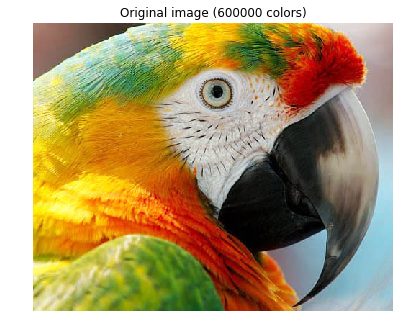

In [8]:
# Displaying original image
%matplotlib inline
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(400*500*3)+" colors)"
plt.title(s)
plt.imshow(image)

# Result

In [ ]:
#Displaying Image using k-means with 4 colors
%matplotlib inline
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(final_centroids, labels, w, h))

In [10]:
originalsize = 400*500*24
quantizedsize = 24*8+400*500*2
rate = quantizedsize/originalsize
print(rate)
print('The original image size is 400×500×24 = %dbits' %(originalsize))
print('The quantized image size is 24×8+400×500×log2(4) = %dbits' %(quantizedsize))
print('The compressed rate is %.2f%%' %(rate*100))

0.08337333333333333
The original image size is 400×500×24 = 4800000bits
The quantized image size is 24×8+400×500×log2(4) = 400192bits
The compressed rate is 8.34%


# Sklearn KMeans

In [11]:
## Let's see the Color Qurantization using sklearn Kmeans
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(image_array)

In [13]:
labels = kmeans.predict(image_array)

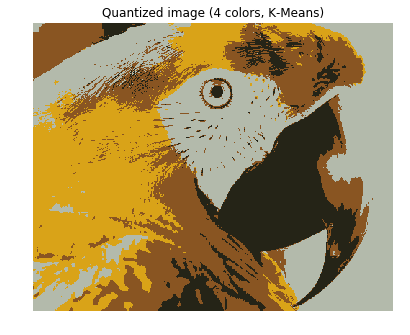

In [14]:
%matplotlib inline
#Displaying Image using k-means with 4 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))